# Module 5: Assignment 1

# Problem 1
-----------

How many possible colors can be represented with the 24-bit RGB model?

2 ** 24

Imagine that we have a fairly large, but very boring image: a 5,000 × 5,000 pixel image composed of nothing but white pixels. If we used an uncompressed image format such as BMP, with the 24-bit RGB color model, how much storage would be required for the file?

24 * 5000 ^ 2 bits

Create a 5,000 x 5,000 pixel white image using `skimage` and save it to a file as `BMP` format. How does the size compare to your prediction? Save a version in JPEG format. How does the size compare? 

In [22]:
import skimage
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import gzip
import shutil
from PIL import Image as im
from scipy.spatial import distance as dist

In [2]:
img = np.zeros([5000,5000,3],dtype=np.uint8) #https://stackoverflow.com/questions/10465747/how-to-create-a-white-image-in-python
img.fill(255)  

In [3]:
io.imsave(fname="white.bmp", arr=img)

<ipython-input-3-d8094ee44337>:1: UserWarning: white.bmp is a low contrast image
  io.imsave(fname="white.bmp", arr=img)


The image is 75 mb. This is off by a factor of 8 from the prediction.

In [4]:
io.imsave(fname="white.jpeg", arr=img)

<ipython-input-4-b1d282edf845>:1: UserWarning: white.jpeg is a low contrast image
  io.imsave(fname="white.jpeg", arr=img)


The jpeg is 393 kb or .524% of the bmp.

Compress your `.bmp` image using `gzip` and compare the size to the `.jpg` file. Which compression is better?

In [5]:
with open('white.bmp', 'rb') as f_in:
    with gzip.open('white.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

Using gzip results in an image that is seventy three kb, so this seems to be a better compression in this case.

Select an image and load it into the notebook. Please make sure that the image is referenced correctly in the repository so that it can be loaded from a downloaded repository.

uint8


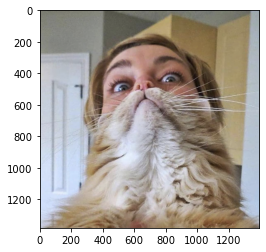

In [6]:
# show image here
photo = io.imread("photos/module-5-assets/catbeard.png")
#print(photo)
photo = photo[:,:,:3] #remove alpha
print(photo.dtype)
plt.imshow(photo)

Create 3 versions using different JPEG compression levels. You can do this with `scimage` or locally with a photo editor. Show the photos in the notebook. Can you visually see a distinction between them?


In [7]:
# photos
#print(photo[0,0])
#filtered = photo.convert('RGB')#.alpha(photo)
io.imsave(fname="catbad.jpeg", arr=photo, quality = 1)
io.imsave(fname="catmid.jpeg", arr=photo, quality = 10)
io.imsave(fname="catbest.jpeg", arr=photo, quality = 100)

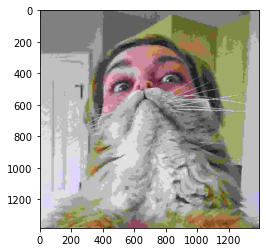

In [8]:
photo = io.imread("catbad.jpeg")
plt.imshow(photo)

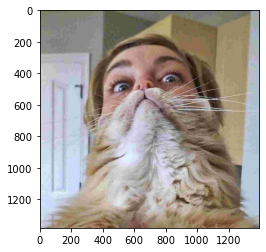

In [9]:
photo = io.imread("catmid.jpeg")
plt.imshow(photo)

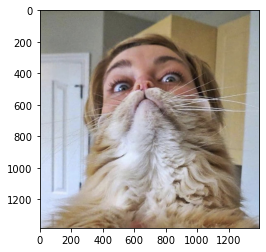

In [10]:
photo = io.imread("catbest.jpeg")
plt.imshow(photo)

Even viewed from the notebook, we can see differences in all three of the images. The difference between the second and third is somewhat less pronounced but is still very much visible.

Agressive compressions algorithms will try to merge color variations into a single intensity to improve the compression. Plot the color histograms for each of the images along with the original. 

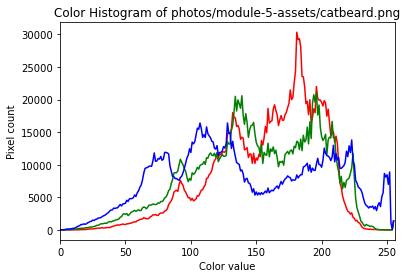

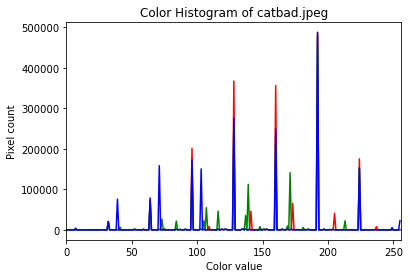

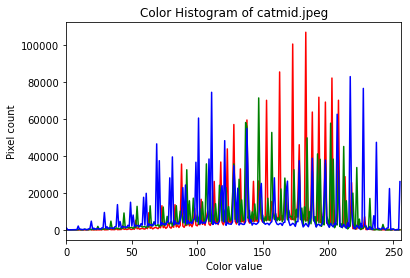

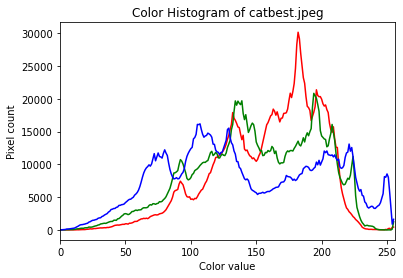

In [17]:
locations = ["photos/module-5-assets/catbeard.png", "catbad.jpeg", "catmid.jpeg", "catbest.jpeg"]
#prefix = "photos/module-5-assets/"
# Create and plot
# tuple to select colors of each channel line
histograms = []
for location in locations:
    photo = io.imread(location)
    colors = ("red", "green", "blue")
    channel_ids = (0, 1, 2)

    # create the histogram plot, with three lines, one for
    # each color
    plt.figure()
    plt.xlim([0, 256])
    parthistogram = []
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            photo[:, :, channel_id], bins=256, range=(0, 256) #change image
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)
        parthistogram.append(histogram)
    histograms.append(parthistogram)
    plt.title("Color Histogram of " + location)
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")

    plt.show()

Research an algorithm that provides for the comparison of histograms. You can look at existing Python modules or packages, academic papers, or create your own. Implement or apply the algorithm and compare each compressed JPG image to the original. 

Provide a brief description of your approach, the algorithm (including citation), and any results.



In [12]:
#https://pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/
scipymethods = {}

ModuleNotFoundError: No module named 'cv2'

In [27]:
for i in range(len(histograms)):
    for j in range(i + 1, len(histograms)):
        print(f"distance between histogram {i} {j}:")
        #print(dist.chebyshev(histogram[i], histogram[j]))
        print(dist.euclidean(histogram[i], histogram[j]))
#dist.chebyshev()

distance between histogram 0 1:
1.0
distance between histogram 0 2:
16.0
distance between histogram 0 3:
30.0
distance between histogram 1 2:
17.0
distance between histogram 1 3:
31.0
distance between histogram 2 3:
14.0
